In [1]:
#This workbook contains exploratory data analysis, primarily on the merged windfarm and zillow data;
#with some comparisons back to the windfarm and zillow cleaned data.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the merged windfarm and zillow csv file to a dataframe
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\MergedData
df_me = pd.read_csv('merged_wi_and_zi.csv')
df_me.head(1)

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\MergedData


,Unnamed: 0,state,county,fips,project_name,project_op_year,windmills_count,capacity,longitude,latitude,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,0,MA,Worcester County,25027,Nature's Classroom Wind Turbine,2009,1,0.1,-72.003899,42.110889,...,290300,279200,276000,252000,244500.0,259900.0,287800.0,295100.0,289100.0,NaN


In [5]:
#Load the cleaned zillow csv file to a dataframe
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\ZillowData
df_zi = pd.read_csv('project1_housing_data.csv')
df_zi.head(1)

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\ZillowData


,Unnamed: 0,ZipCode,StateName,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,0,60657,Illinois,366800.0,380300.0,392100.0,394000.0,389300.0,380200.0,366300.0,...,414800.0,411200.0,403000.0,407500.0,421700.0,367400.0,367000.0,364600.0,414100.0,413200.0


In [6]:
#Load the cleaned & expanded windfarm csv file to a dataframe
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\WindfarmData

df_wf = pd.read_csv('project1_windfarm_data_expanded.csv')

df_wf.head(1)

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\WindfarmData


,Unnamed: 0,Unnamed: 0.1,state,county,fips,project_name,project_op_year,windmills_count,capacity,longitude,latitude,zipcode,pop_density,med_household_income
0,0,0,CA,Kern County,6029,251 Wind,1987,194,18.43,-118.360725,35.083778,93561,131,57433.0


In [7]:
#Count the records in the original windfarm data and compare to the count in the merged windfarm data.

orig_wf_count = len(df_wf['zipcode'].unique())

merg_wf_count = len(df_me['zipcode'].unique())

merg_number_of_states = len(df_me['state'].unique())

print('original windfarm data count: ' + str(orig_wf_count))
print('merged windfarm data count: ' + str(merg_wf_count))
print('merged number of states with windfarms: ' + str(merg_number_of_states))

original windfarm data count: 1269
merged windfarm data count: 58
merged number of states with windfarms: 13


In [8]:
#States with the highest# of windfarms (given that the merged data only contains states that have zillow housing data)
df_states = df_me[['state','project_name']]

df_grouped = df_states.groupby(['state','project_name']).size().reset_index(name='windmill_count')

df_grouped2 = df_grouped.groupby(['state']).size().reset_index(name='windfarm_count')

df_grouped2 = df_grouped2.sort_values('windfarm_count',ascending=False)

df_grouped2.head(5)

,state,windfarm_count
0,CA,94
4,MA,14
5,MN,6
7,OH,5
9,RI,5


In [9]:
#States with the lowest # of windfarms (given that the merged data only contains states that have zillow housing data)
df_grouped2.tail(5)

,state,windfarm_count
3,IL,1
6,NY,1
8,OK,1
11,UT,1
12,WA,1


In [10]:
#Using top 5 states with windfarms, determine if there is sufficient housing data available for each state
dfs = df_me

dfs = dfs.drop(dfs.columns[[0,2,3,5,6,7,8,9,11,12,13,14,15]], axis=1)

dfs2 = dfs[(dfs.state == 'CA') | (dfs.state == 'MA') | (dfs.state == 'MN') | (dfs.state == 'OH') | (dfs.state == 'RI')]

dfs3 = dfs2.drop_duplicates(subset='project_name', keep='first')

dfs3['nan_count'] = dfs3.isnull().sum(axis=1).tolist()
dfs3['valid_count'] = dfs3.notnull().sum(axis=1).tolist()
dfs3['total_count'] = dfs3['nan_count'] + dfs3['valid_count']

dfs4 = dfs3[['state','project_name','zipcode','valid_count','nan_count','total_count']]

#CA - sufficient housing data (1 of 5)
dfs_CA = dfs4.loc[dfs4['state'] == 'CA']
dfs_CA = dfs_CA.sort_values(by=['nan_count'])

dfs_CA.head(3)

,state,project_name,zipcode,valid_count,nan_count,total_count
75,CA,Inland Empire Utility Agency,91739,130,0,130
2864,CA,unknown Kern County,93561,130,0,130
2863,CA,Alta IV,93561,130,0,130


In [11]:
#MA - sufficient housing data (2 of 5)
dfs_MA = dfs4.loc[dfs4['state'] == 'MA'].sort_values(by='nan_count')
dfs_MA.head(3)

,state,project_name,zipcode,valid_count,nan_count,total_count
5,MA,Scituate Wind,2066,129,1,130
7,MA,Charlestown Wind Turbine,2129,129,1,130
11,MA,City of Medford,2155,129,1,130


In [12]:
#MN - sufficient housing data (3 of 5)
dfs_MN = dfs4.loc[dfs4['state'] == 'MN'].sort_values(by='nan_count')
dfs_MN.head(3)

,state,project_name,zipcode,valid_count,nan_count,total_count
33,MN,Hometown WindPower North St. Paul,55109,130,0,130
32,MN,Eolos,55068,88,42,130
37,MN,Shakopee Mdewakanton Sioux Community Wind,55379,76,54,130


In [13]:
#OH - sufficient housing data (4 of 5)
dfs_OH = dfs4.loc[dfs4['state'] == 'OH'].sort_values(by='nan_count')
dfs_OH.head(3)

,state,project_name,zipcode,valid_count,nan_count,total_count
27,OH,unknown Lorain County,44039,129,1,130
29,OH,Three D Metals Corporation,44212,81,49,130
25,OH,Clay High School,43616,77,53,130


In [14]:
#RI - sufficient housing data (5 of 5)
dfs_RI = dfs4.loc[dfs4['state'] == 'RI'].sort_values(by='nan_count')
dfs_RI.head(3)

,state,project_name,zipcode,valid_count,nan_count,total_count
18,RI,WED Portsmouth 1,2871,57,73,130
19,RI,Hodges Badge,2871,57,73,130
20,RI,Portsmouth Abbey School,2871,57,73,130


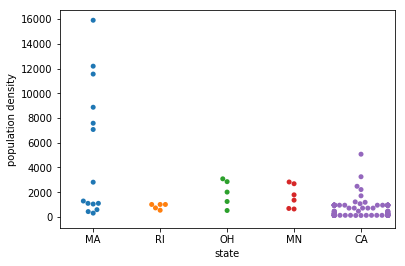

In [15]:
#Visualize the population density for the five states as a swarmplot
dfp = df_me

dfp = dfp[['state','project_name','pop_density']]

dfp2 = dfp[(dfp.state == 'CA') | (dfp.state == 'MA') | (dfp.state == 'RI') | (dfp.state == 'MN') | (dfp.state == 'OH')]

dfp3 = dfp2.drop_duplicates(subset='project_name', keep='first')

_ = sns.swarmplot(x='state', y='pop_density', data=dfp3)
_ = plt.xlabel('state')
_ = plt.ylabel('population density')

plt.show()

In [16]:
#Display the minimum and maximum population density for the merged dataset
df_pop = df_me[['pop_density']].sort_values(by='pop_density')

min_pop_density = df_pop.min()
max_pop_density = df_pop.max()

print('Minimum population density: ' + str(min_pop_density))
print('Maximum population density: ' + str(max_pop_density))

Minimum population density: pop_density    118
dtype: int64
Maximum population density: pop_density    15907
dtype: int64


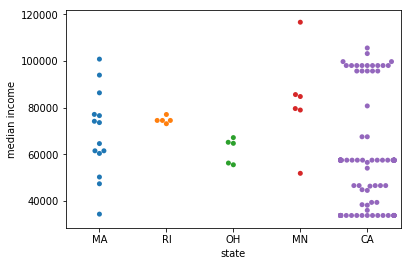

In [17]:
#Visualize the median household income for the five states as a swarmplot
dfp = df_me

dfp = dfp[['state','project_name','med_household_income']]

dfp2 = dfp[(dfp.state == 'CA') | (dfp.state == 'MA') | (dfp.state == 'RI') | (dfp.state == 'MN') | (dfp.state == 'OH')]

dfp3 = dfp2.drop_duplicates(subset='project_name', keep='first')

_ = sns.swarmplot(x='state', y='med_household_income', data=dfp3)
_ = plt.xlabel('state')
_ = plt.ylabel('median income')

plt.show()

In [18]:
#Display the minimum and maximum median household income for the merged dataset
df_inc = df_me[['med_household_income']]

min_inc = df_inc.min()
max_inc = df_inc.max()

print('Minimum median income: ' + str(min_inc))
print('Maximum median income: ' + str(max_inc))

Minimum median income: med_household_income    33682
dtype: int64
Maximum median income: med_household_income    120202
dtype: int64


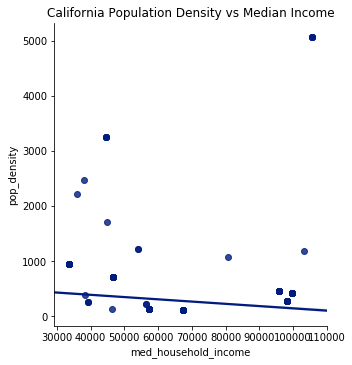

In [77]:
#Display the relationship between population median and median household income for CA as a scatterplot
dsc = df_me[['state','pop_density','med_household_income']]

dsc2 = dsc[(dsc.state == 'CA')]

current_palette = sns.color_palette('dark')
sns.set_palette(current_palette)

_ = sns.lmplot(x='med_household_income', y='pop_density', hue='state', fit_reg=True, legend=False, data=dsc2)
_ = plt.title('California Population Density vs Median Income', fontsize=12)

plt.show()

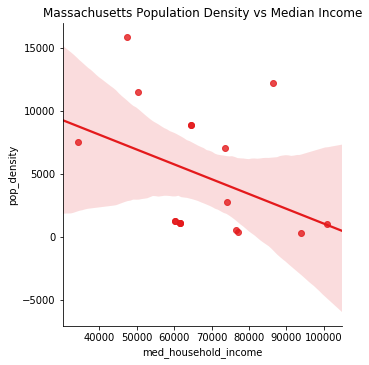

In [81]:
#Display the relationship between population median and median household income for CA as a scatterplot
dsc = df_me[['state','pop_density','med_household_income']]

dsc2 = dsc[(dsc.state == 'MA')]

current_palette = sns.color_palette('Set1')
sns.set_palette(current_palette)

_ = sns.lmplot(x='med_household_income', y='pop_density', hue='state', legend=False, fit_reg=True, data=dsc2)
_ = plt.title('Massachusetts Population Density vs Median Income', fontsize=12)

plt.show()